Notebook for analysis

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath(r"CC:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\olist review analysis"))

import src.plots as P
import src.stat_tests as S

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [3]:
data = pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\olist review analysis\data\processed_data\processed_olist_data.csv")

In [4]:

pd.set_option('display.max_columns',None)

In [5]:

data.head()

,review_score,review_creation_date,total_unique_products,total_products,avg_price,avg_freight,is_multiple_seller,max_attempt,payment_type_used,installment_duration,total_paid_value,order_status,approval_time,delivery_time,delivery_delay,product_id,product_category_name,dimensional_weight
0,4,2018-01-18,1,2,185.0,14.0,0,1,1,8,397.26,delivered,0.0,6.0,-16.0,2.0,1.0,10.50
1,5,2018-03-10,1,1,80.0,8.0,0,1,1,1,88.09,delivered,0.0,9.0,-5.0,1.0,1.0,0.62
2,5,2018-02-17,1,1,149.0,45.0,0,1,1,1,194.12,delivered,0.0,13.0,-21.0,1.0,1.0,1.33
3,5,2017-04-21,1,1,180.0,43.0,0,1,1,1,222.84,delivered,0.0,11.0,-20.0,1.0,1.0,1.33
4,5,2018-03-01,1,1,1199.0,134.0,0,1,1,10,1333.25,delivered,0.0,18.0,-9.0,1.0,1.0,30.62


In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review_score           99224 non-null  int64  
 1   review_creation_date   99224 non-null  object 
 2   total_unique_products  99224 non-null  int64  
 3   total_products         99224 non-null  int64  
 4   avg_price              99224 non-null  float64
 5   avg_freight            99224 non-null  float64
 6   is_multiple_seller     99224 non-null  int64  
 7   max_attempt            99224 non-null  int64  
 8   payment_type_used      99224 non-null  int64  
 9   installment_duration   99224 non-null  int64  
 10  total_paid_value       99224 non-null  float64
 11  order_status           99224 non-null  object 
 12  approval_time          99068 non-null  float64
 13  delivery_time          96359 non-null  float64
 14  delivery_delay         96359 non-null  float64
 15  pr

In [7]:

data.describe().round(2)

,review_score,total_unique_products,total_products,avg_price,avg_freight,is_multiple_seller,max_attempt,payment_type_used,installment_duration,total_paid_value,approval_time,delivery_time,delivery_delay,product_id,product_category_name,dimensional_weight
count,99224.00,99224.00,99224.00,99224.00,99224.00,99224.00,99224.00,99224.00,99224.00,99224.00,99068.00,96359.00,96359.00,98465.00,98465.00,99224.00
mean,4.09,1.03,1.13,124.63,20.02,0.01,1.05,1.02,2.93,160.56,0.52,12.46,-11.92,1.14,0.99,2.87
std,1.35,0.24,0.54,188.92,15.81,0.11,0.38,0.15,2.72,220.32,1.17,9.47,10.11,0.53,0.15,5.04
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-147.00,1.00,0.00,0.00
25%,4.00,1.00,1.00,40.00,13.00,0.00,1.00,1.00,1.00,61.88,0.00,7.00,-17.00,1.00,1.00,0.48
50%,5.00,1.00,1.00,79.00,16.00,0.00,1.00,1.00,2.00,105.28,0.00,10.00,-12.00,1.00,1.00,1.19
75%,5.00,1.00,1.00,139.00,21.00,0.00,1.00,1.00,4.00,176.71,1.00,16.00,-7.00,1.00,1.00,3.30
max,5.00,8.00,21.00,6735.00,410.00,1.00,29.00,2.00,24.00,13664.08,188.00,208.00,188.00,21.00,3.00,246.00


Statistical insights from numerical columns

In [8]:

data.describe(include='object')

,review_creation_date,order_status
count,99224,99224
unique,636,8
top,2017-12-19,delivered
freq,463,96361


Statistical insights from categorical columns


In [10]:
data.select_dtypes(include='number').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,review_score,5
1,total_unique_products,9
2,total_products,18
3,avg_price,1059
4,avg_freight,233
5,is_multiple_seller,2
6,max_attempt,21
7,payment_type_used,3
8,installment_duration,24
9,total_paid_value,27637


In [13]:
data.select_dtypes(include='number').columns

Index(['review_score', 'total_unique_products', 'total_products', 'avg_price',
       'avg_freight', 'is_multiple_seller', 'max_attempt', 'payment_type_used',
       'installment_duration', 'total_paid_value', 'approval_time',
       'delivery_time', 'delivery_delay', 'product_id',
       'product_category_name', 'dimensional_weight'],
      dtype='object')

In [11]:

data.select_dtypes(include='object').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,review_creation_date,636
1,order_status,8


statistical insight from categorical columns

In [12]:
small_cat_cols = ['is_multiple_seller','payment_type_used','product_category_name','order_status']

In [14]:
large_num_cols = ['total_products', 'avg_price',
       'avg_freight', 'max_attempt',
       'installment_duration', 'total_paid_value', 'approval_time',
       'delivery_time', 'delivery_delay', 'product_id', 'dimensional_weight']

In [15]:
large_cat_cols = ['total_unique_products']

In [16]:
taget_col = ['review_score']

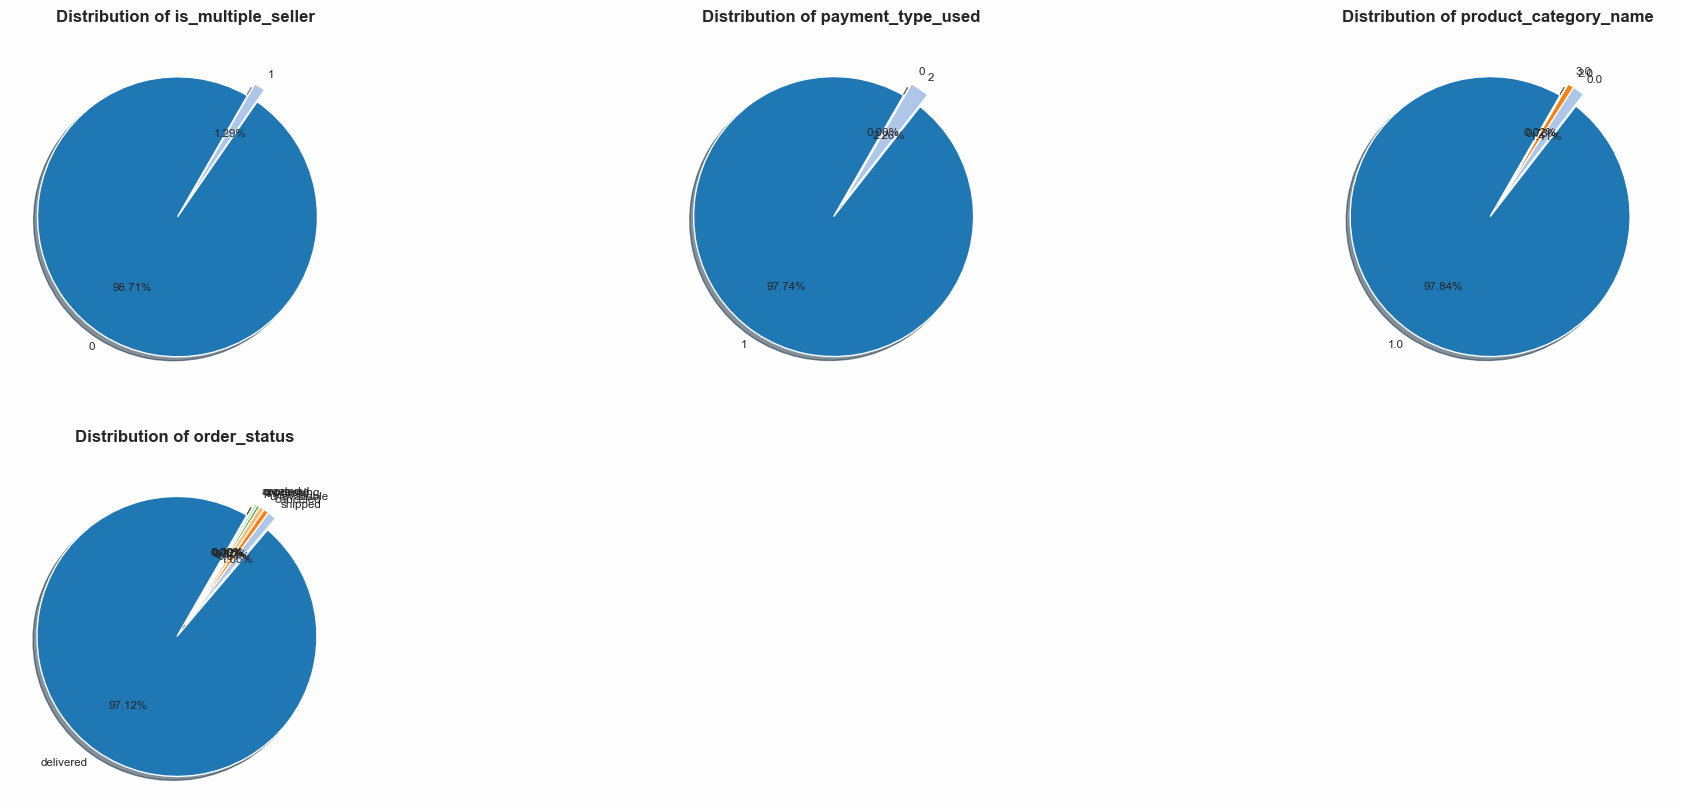

In [20]:
fig = plt.figure(figsize=(24,10))
limit = len(small_cat_cols)
for i,column in enumerate(small_cat_cols):
    if i> limit:
        break
    plt.subplot(2,3,i+1)
    P.plot_pie(column=column,data=data)

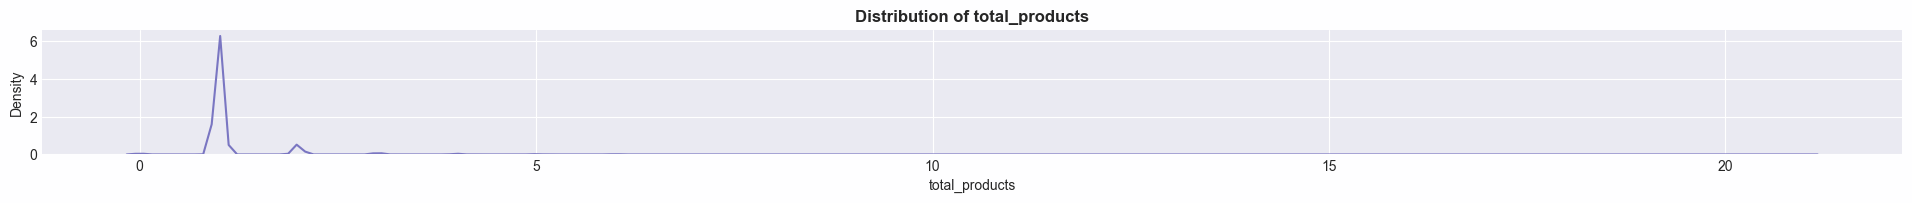

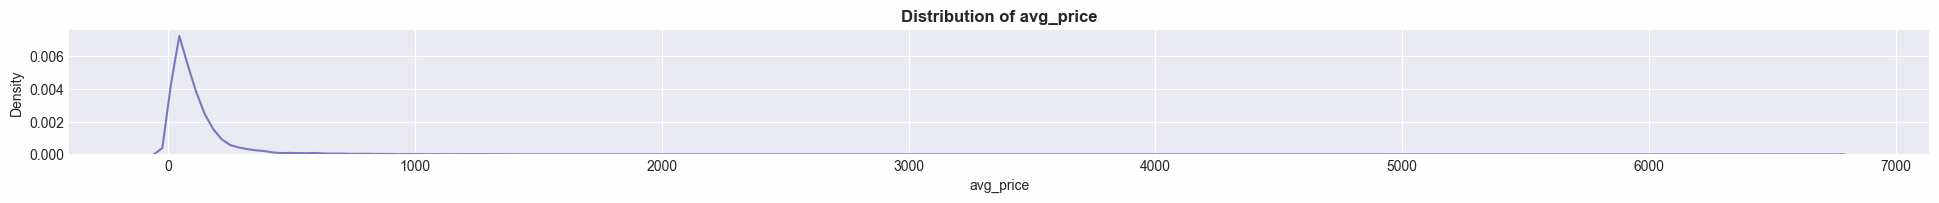

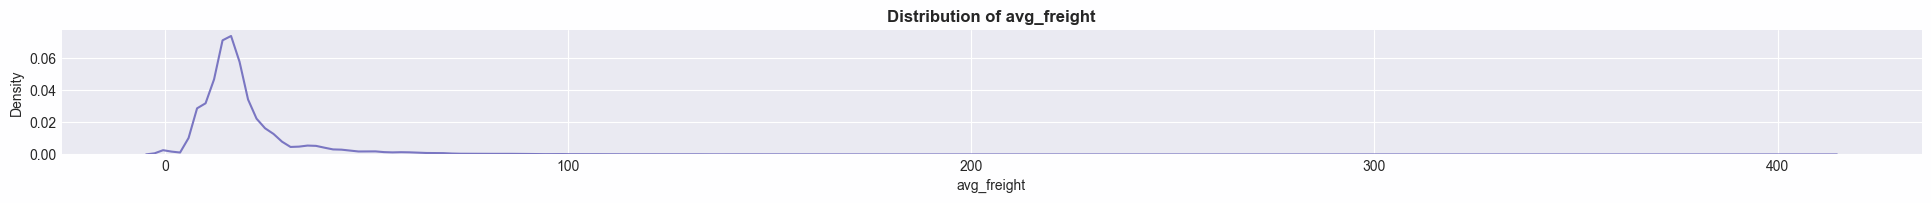

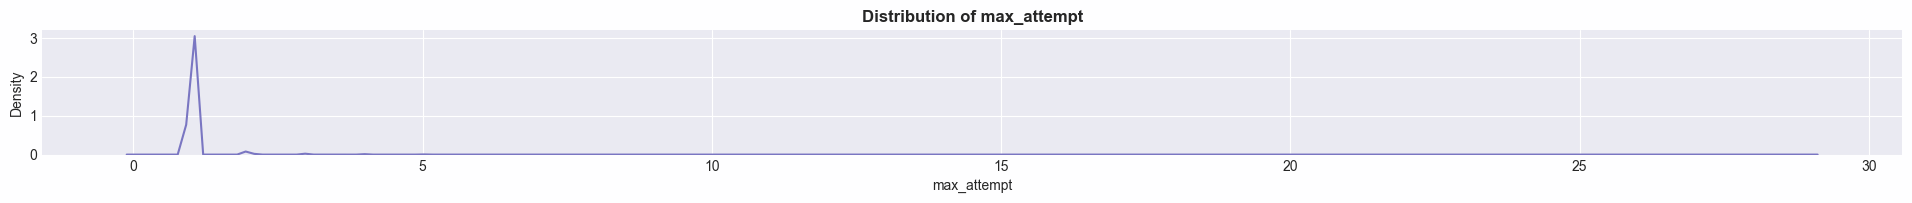

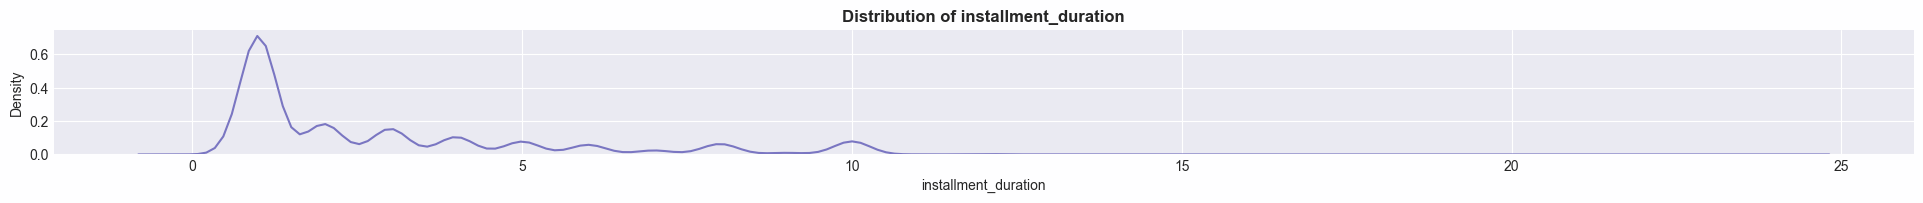

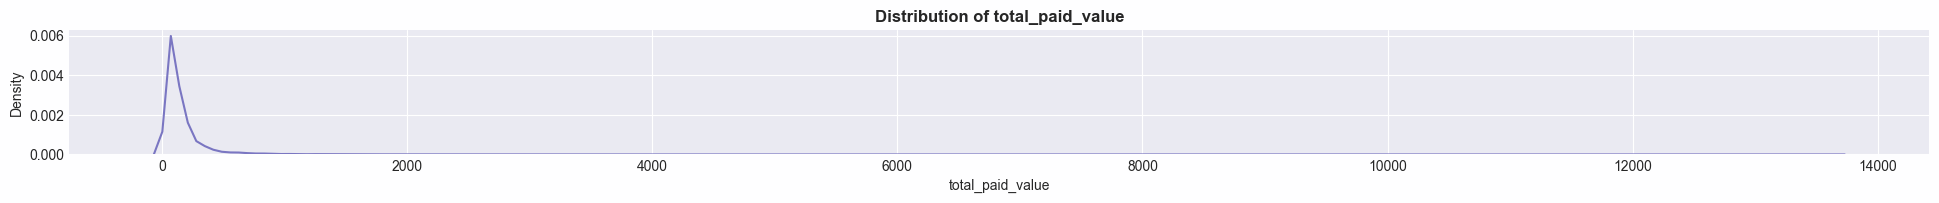

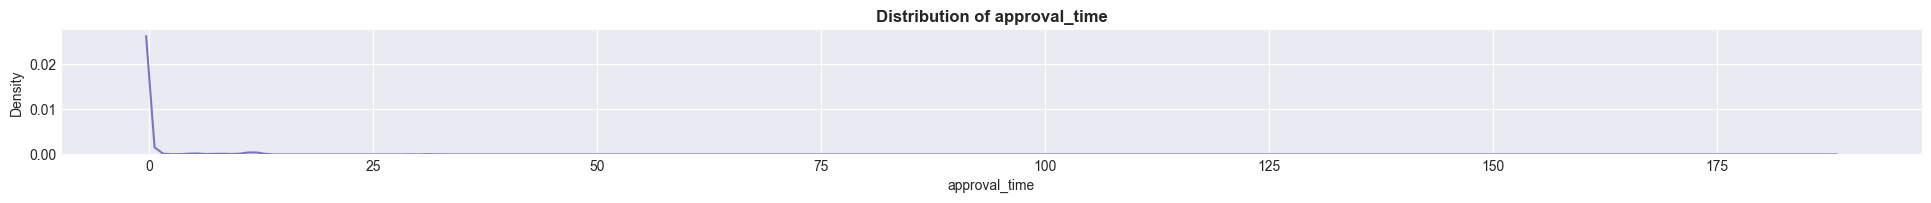

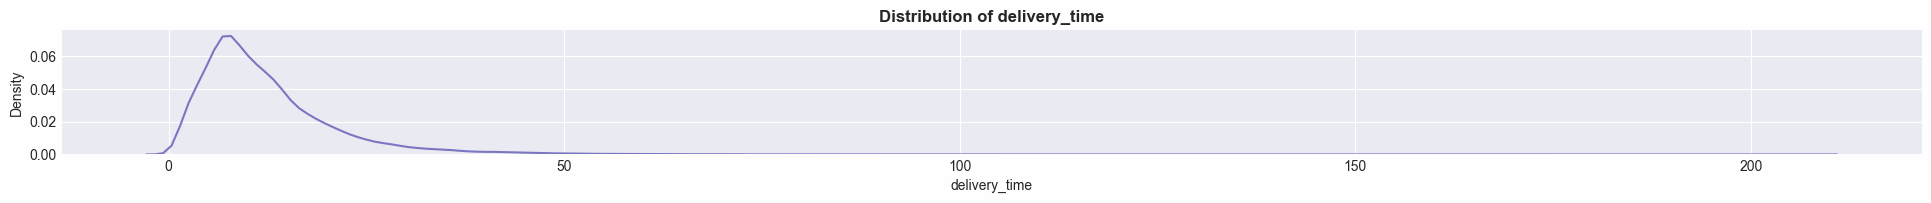

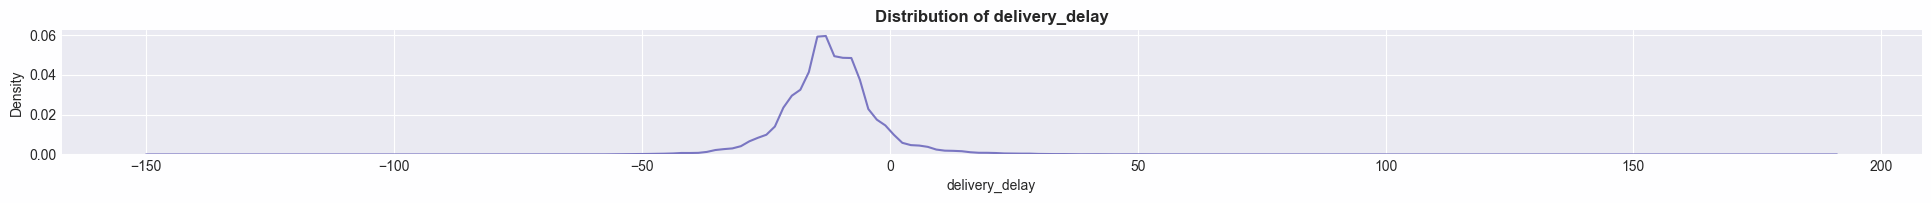

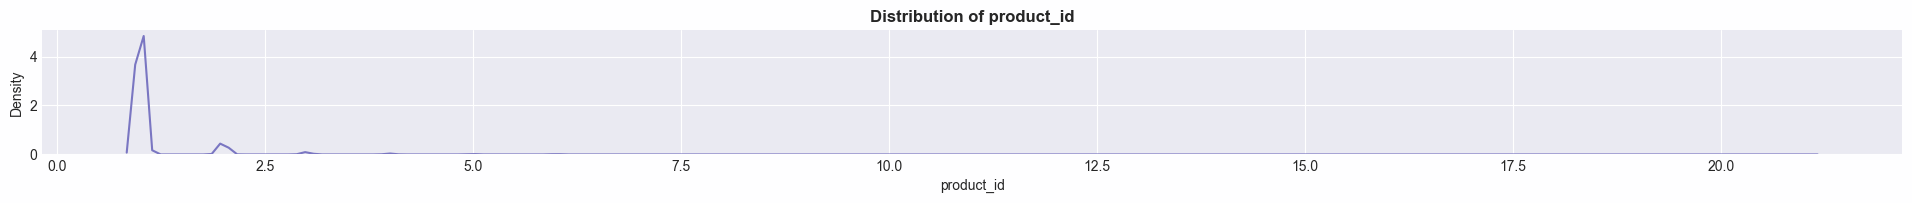

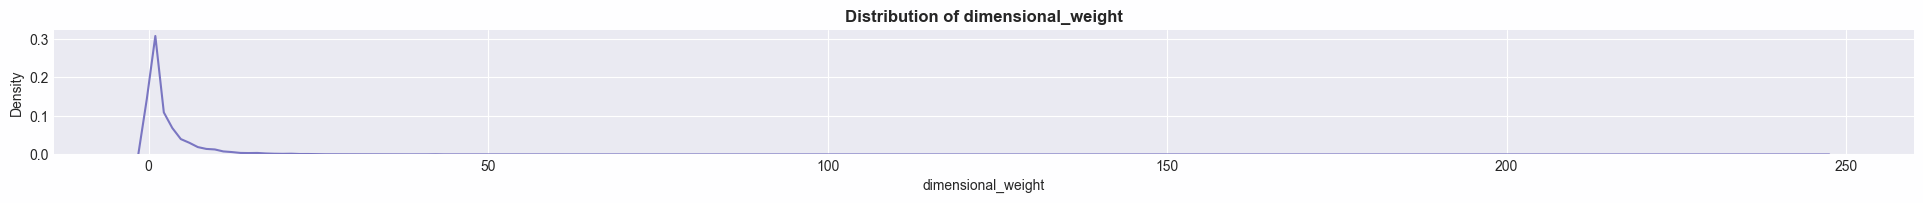

In [22]:
limit = len(large_num_cols)
for i,column in enumerate(large_num_cols):
    if i> limit:
        break
    fig = plt.figure(figsize=(24,21))
    plt.subplot(11,1,i+1)
    P.plot_kde(column=column,data=data)
    plt.show()

Finding of columns based on univariate analysis
Categorical Columns

multiple_seller column have more than 98% occurances of 0

payment_type_used column have more than 97% value of 1

more than 97% of order_status is delivered

Numerical Columns

values in review_score columns mostly around 5 and data is skewed towards left

distribution of total_unique_products is peaked around value 1 and skewed to the right

distribution of total_products is very skewed towards right with a peak towards lower end

avg_price and avg_freight column values are peaked at low end with skewed distribution

max_attempt column values are peaked at low end with skewed distribution

most of the values of installment_duration column is at lower end

total_paid_value is skewed towards right

approval_time is peaked at 0 with skeweness to the right

delivery_time has a peak at lower end

delivery_delay is mostly around 0 with skewed at both sides

product_id and product_category_name is peaked around 1

dimensional_weight is peaked around 0 with skewed towards right

In [23]:

for cols in large_cat_cols:
    df = data[cols].value_counts(normalize=True).mul(100).round(2).reset_index(name = r"% of observations").sort_values(by ="% of observations", ascending = False ).head(10)
    display(df)
    display("_"*50)

,total_unique_products,% of observations
0,1,95.97
1,2,2.87
2,0,0.76
3,3,0.30
4,4,0.07
5,6,0.01
6,5,0.01
7,7,0.00
8,8,0.00


'__________________________________________________'

insight from large cat cols

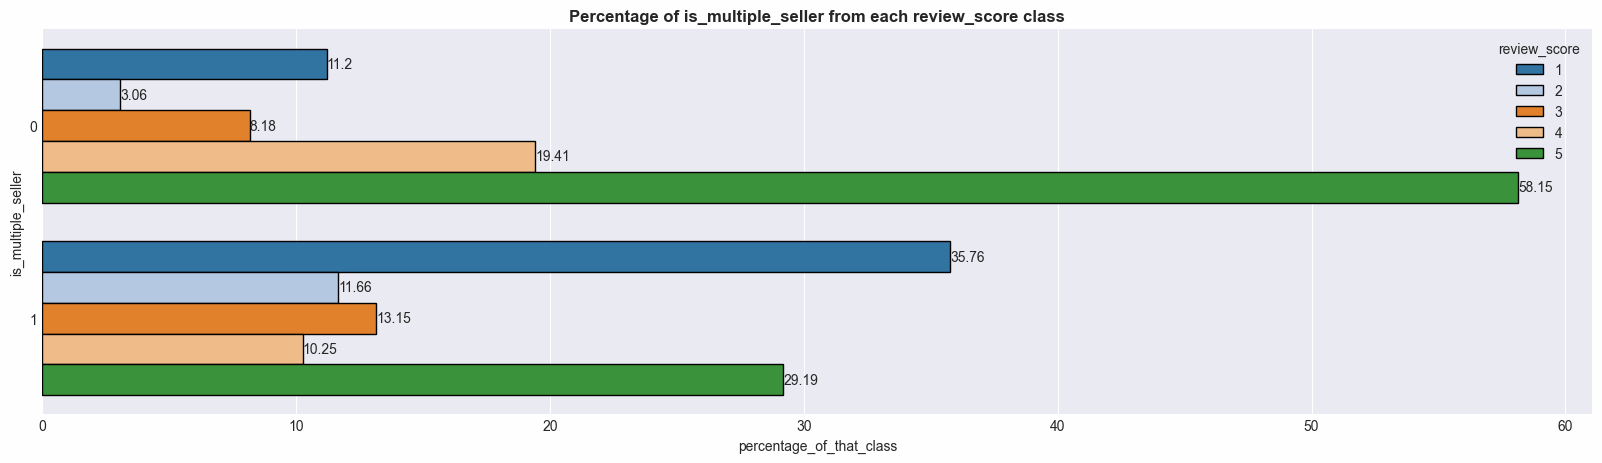

In [24]:

plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='is_multiple_seller',data=data,target='review_score',orient='h')

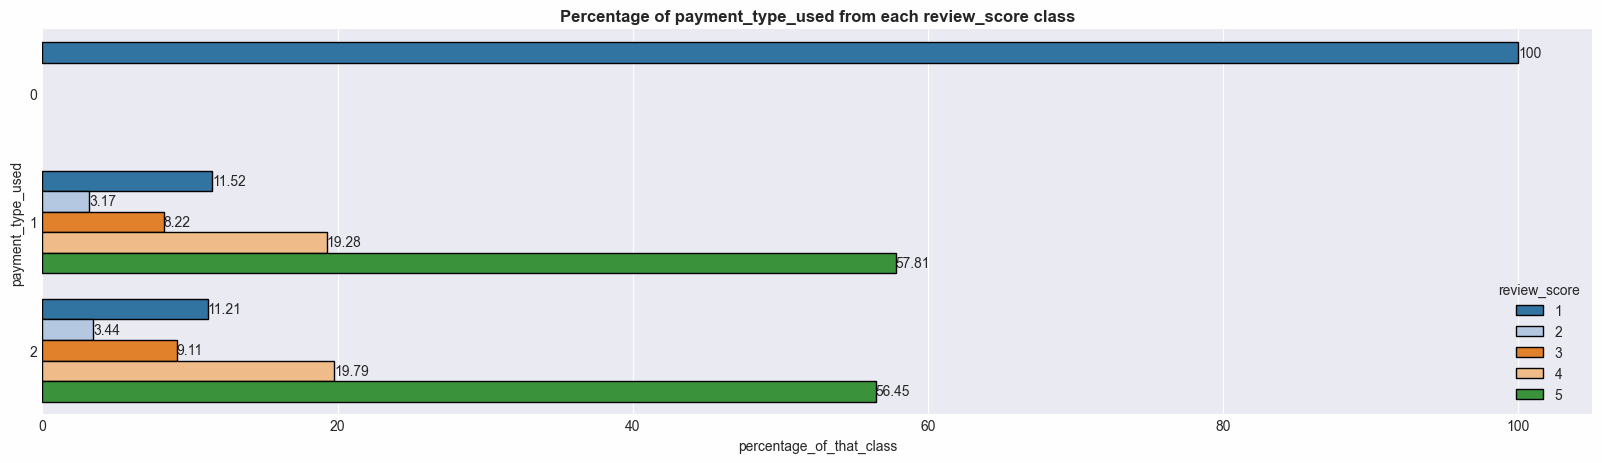

In [25]:

plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='payment_type_used',data=data,target='review_score',orient='h')

In [26]:
data.groupby('payment_type_used')['review_score'].size()

payment_type_used
0        1
1    96984
2     2239
Name: review_score, dtype: int64

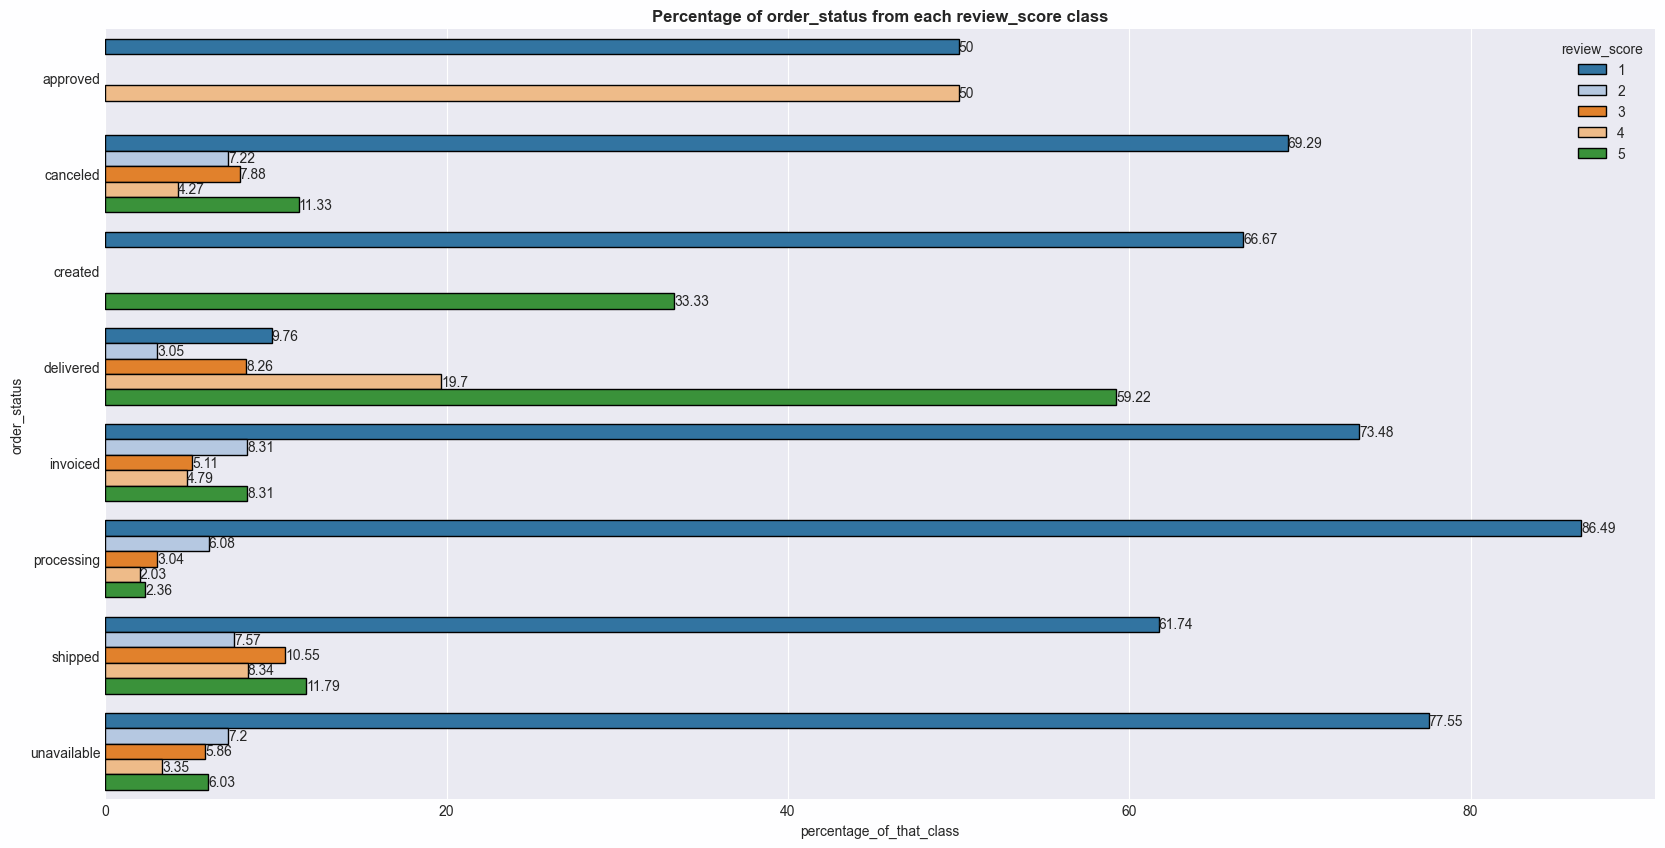

In [30]:
plt.figure(figsize=(20,10))
P.percentage_in_that_class(column='order_status',data=data,target='review_score',orient='h')

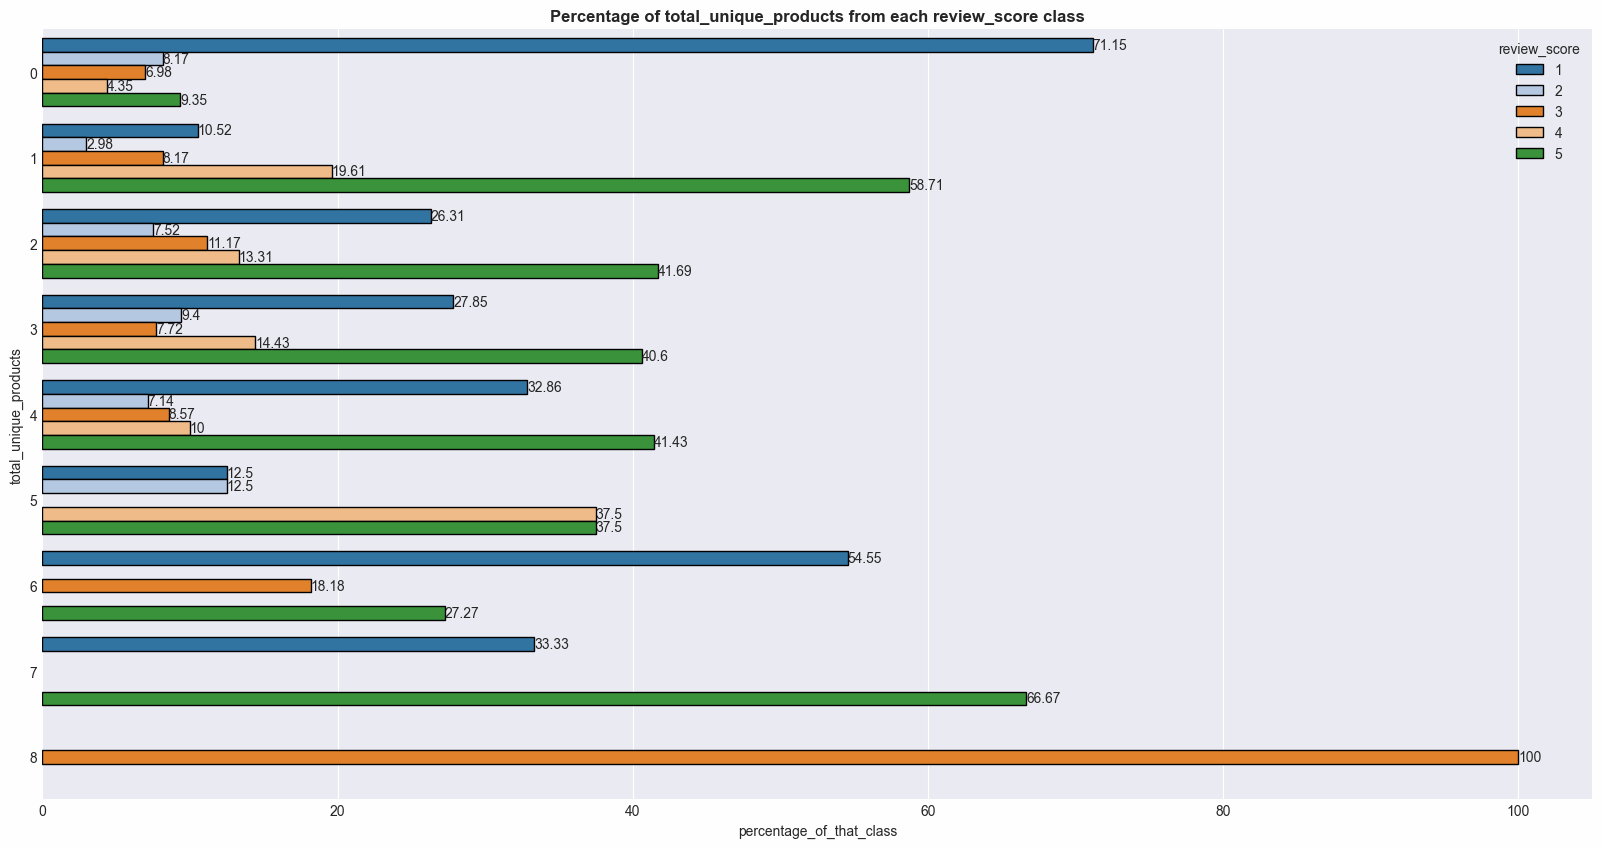

In [31]:
plt.figure(figsize=(20,10))
P.percentage_in_that_class(column='total_unique_products',data=data,target='review_score',orient='h')

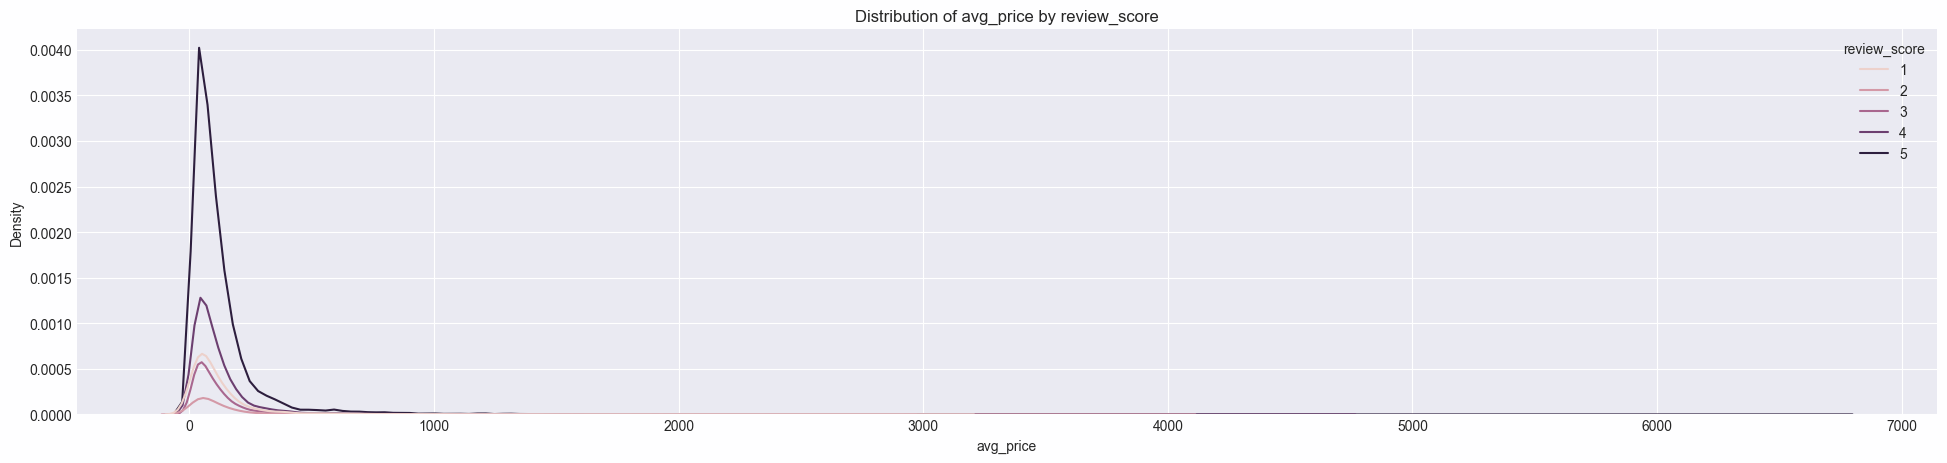

In [32]:

plt.figure(figsize=(24,5))
P.kde_in_both_class(column='avg_price',data= data,target='review_score')

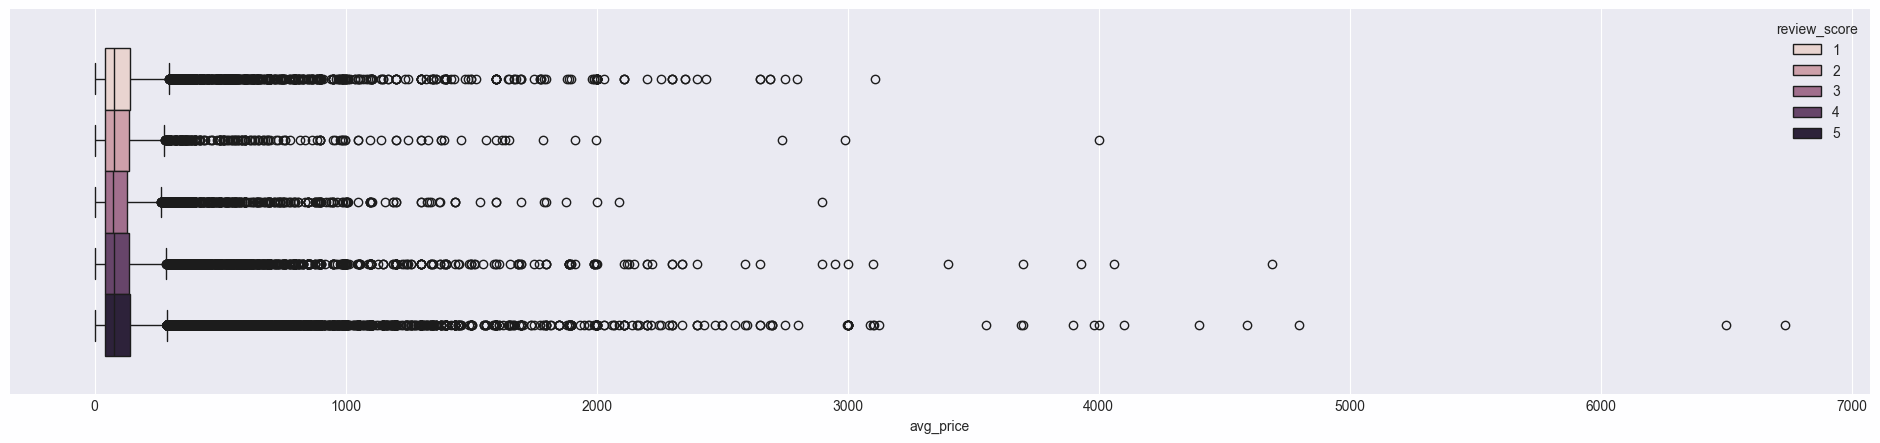

In [33]:
plt.figure(figsize=(24,5))
sns.boxplot(x = 'avg_price',data= data,hue= 'review_score')
plt.show()

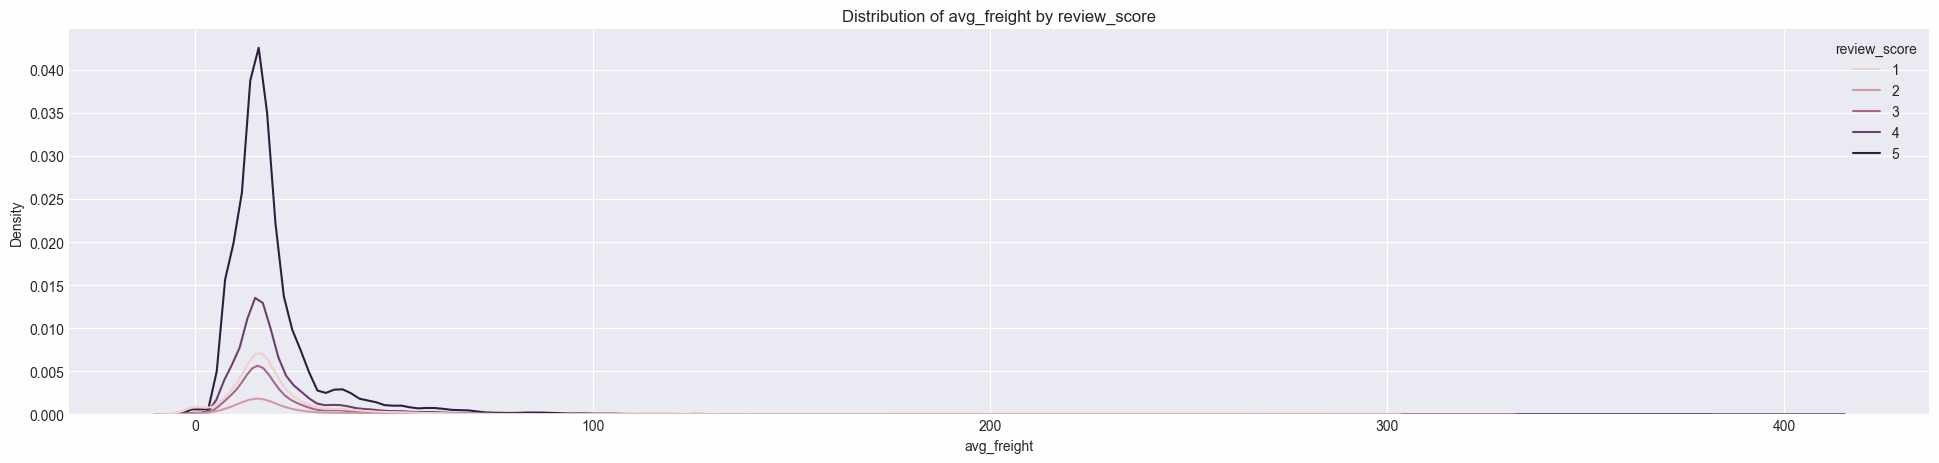

In [34]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='avg_freight',data= data,target='review_score')

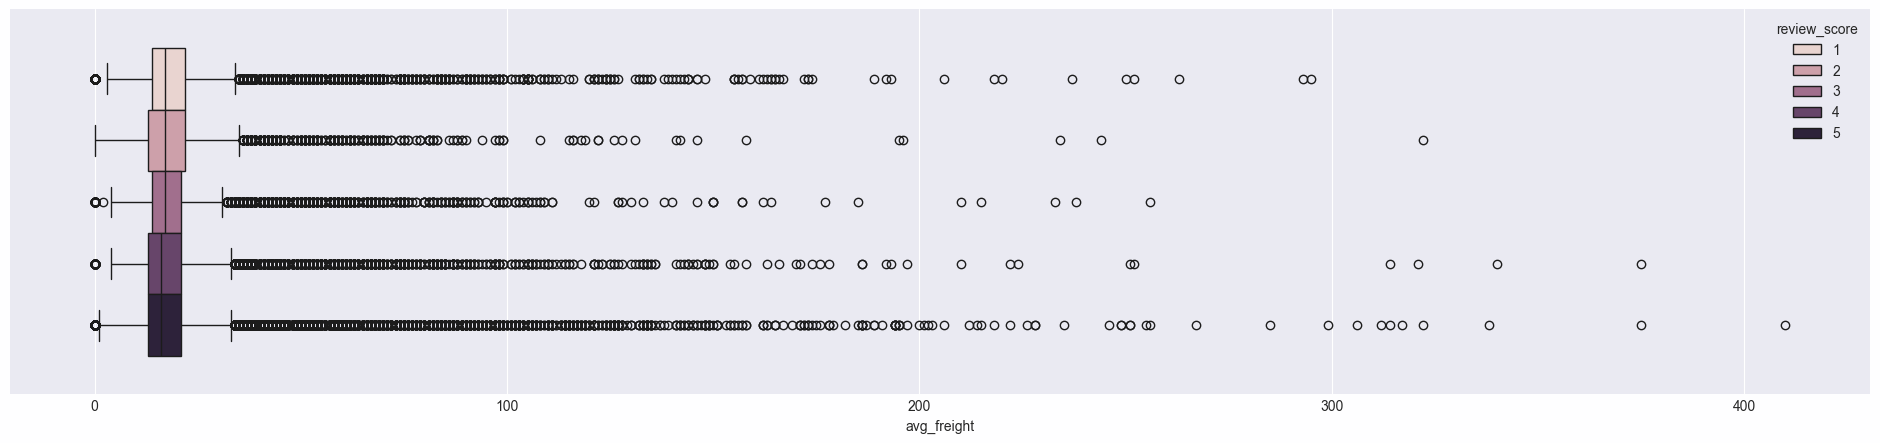

In [35]:
plt.figure(figsize=(24,5))
sns.boxplot(x = 'avg_freight',data= data,hue= 'review_score')
plt.show()

C:\Users\Rano's PC\AppData\Local\Temp\ipykernel_10296\3016915708.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ct = ct.applymap(lambda x: np.log1p(x))


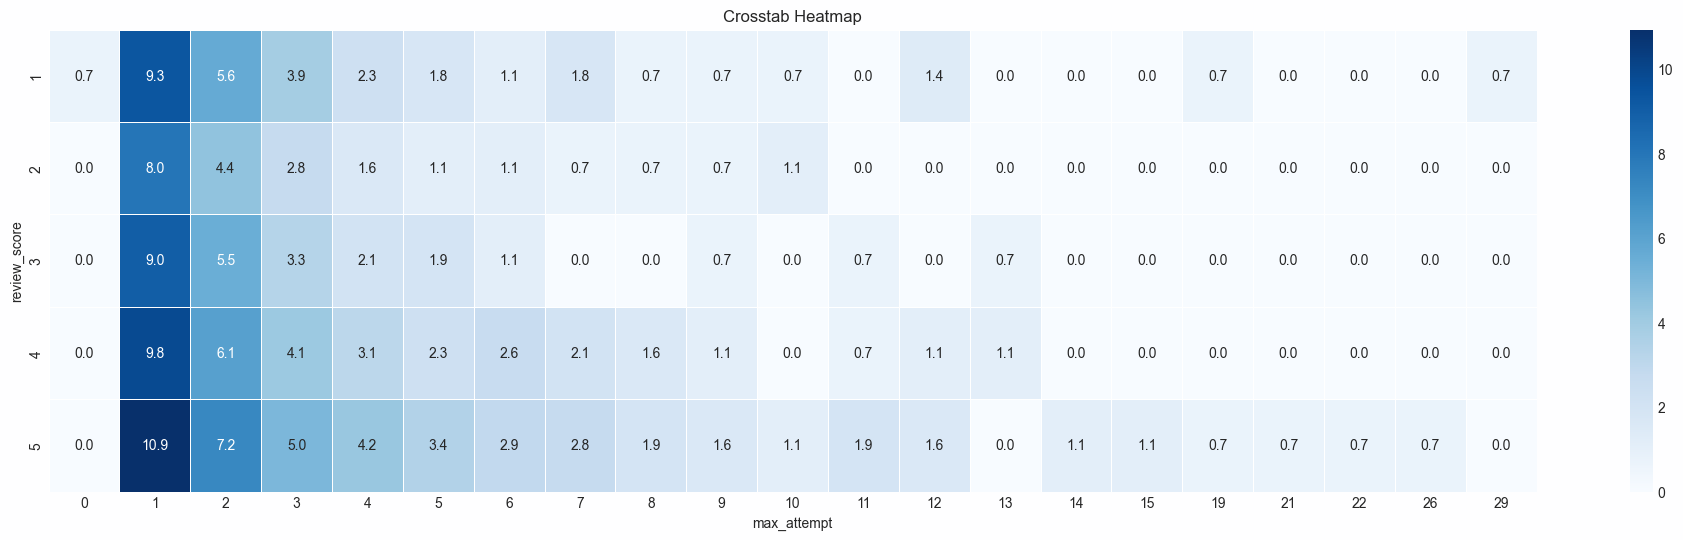

In [39]:
plt.figure(figsize=(24,6))
ct = pd.crosstab(data['review_score'],data['max_attempt']).round(2)
ct = ct.applymap(lambda x: np.log1p(x))
P.plot_heatmap(ct=ct)
plt.show()

C:\Users\Rano's PC\AppData\Local\Temp\ipykernel_10296\683951835.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ct = ct.applymap(lambda x: np.log1p(x))


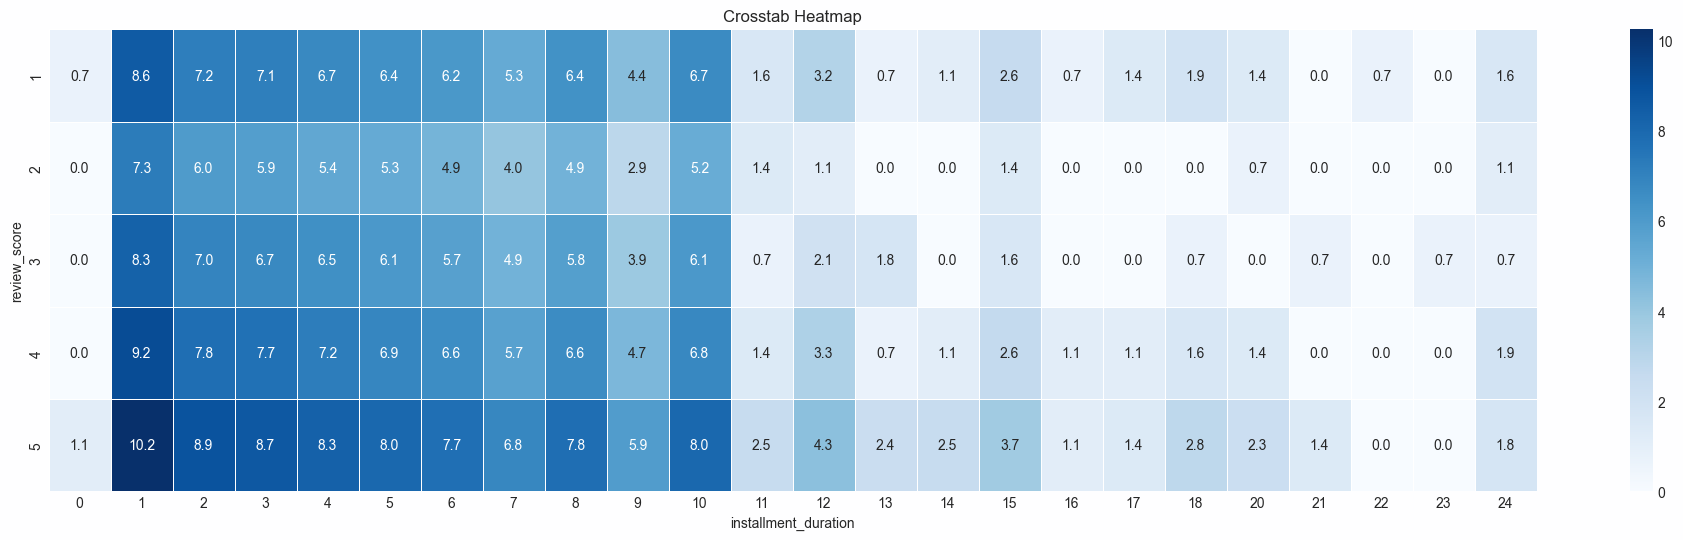

In [40]:
plt.figure(figsize=(24,6))
ct = pd.crosstab(data['review_score'],data['installment_duration']).round(2)
ct = ct.applymap(lambda x: np.log1p(x))
P.plot_heatmap(ct=ct)
plt.show()

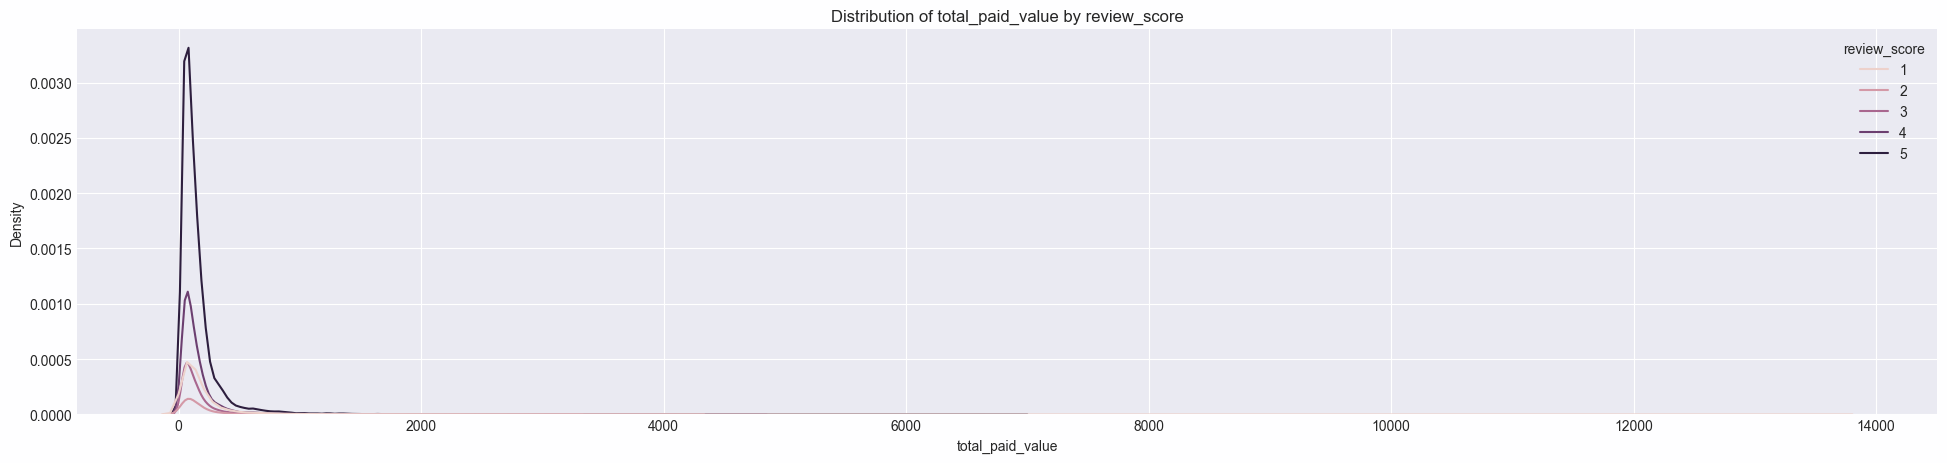

In [41]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='total_paid_value',data= data,target='review_score')

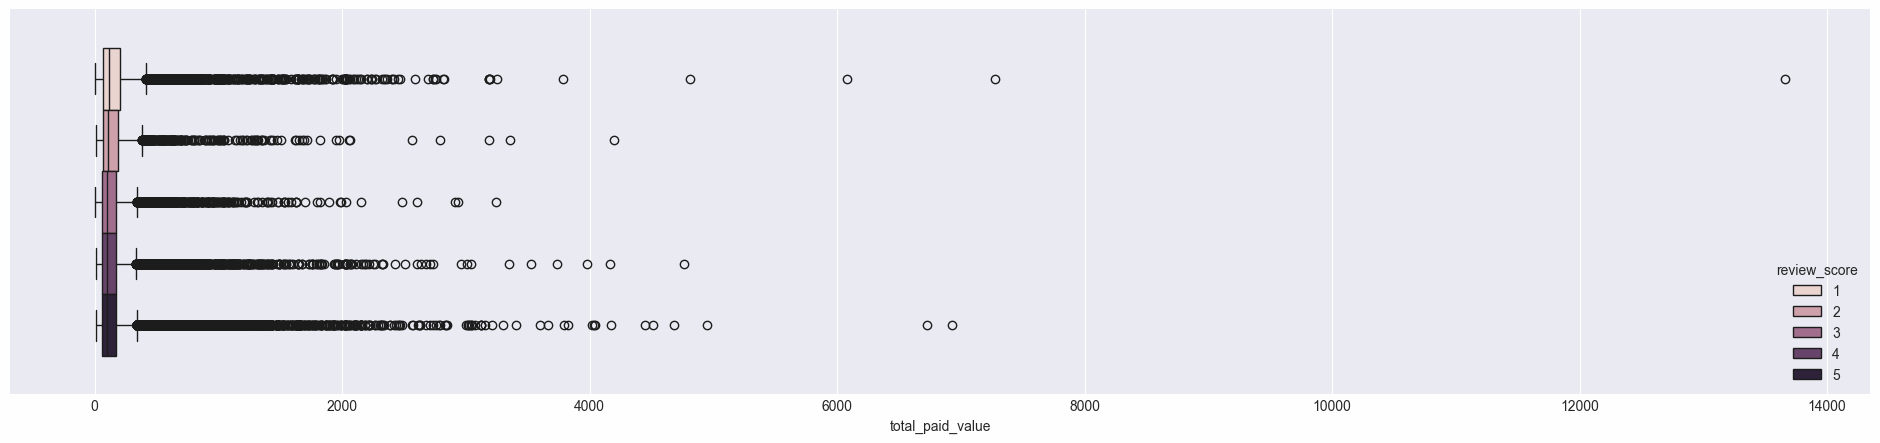

In [42]:
plt.figure(figsize=(24,5))
sns.boxplot(x = 'total_paid_value',data= data,hue= 'review_score')
plt.show()

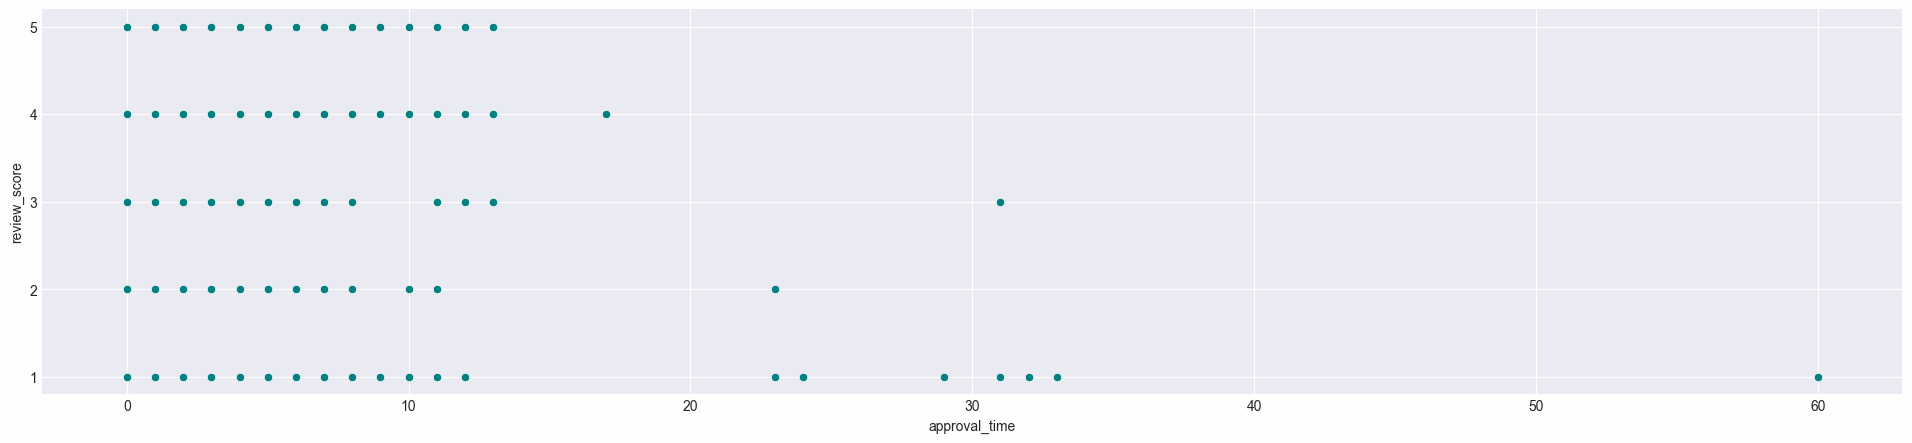

In [43]:
plt.figure(figsize=(24,5))
sns.scatterplot(y = 'review_score',x='approval_time',data= data[data['approval_time']<100],color = 'teal')
plt.yticks(np.linspace(1,5,5).astype(int))
plt.show()

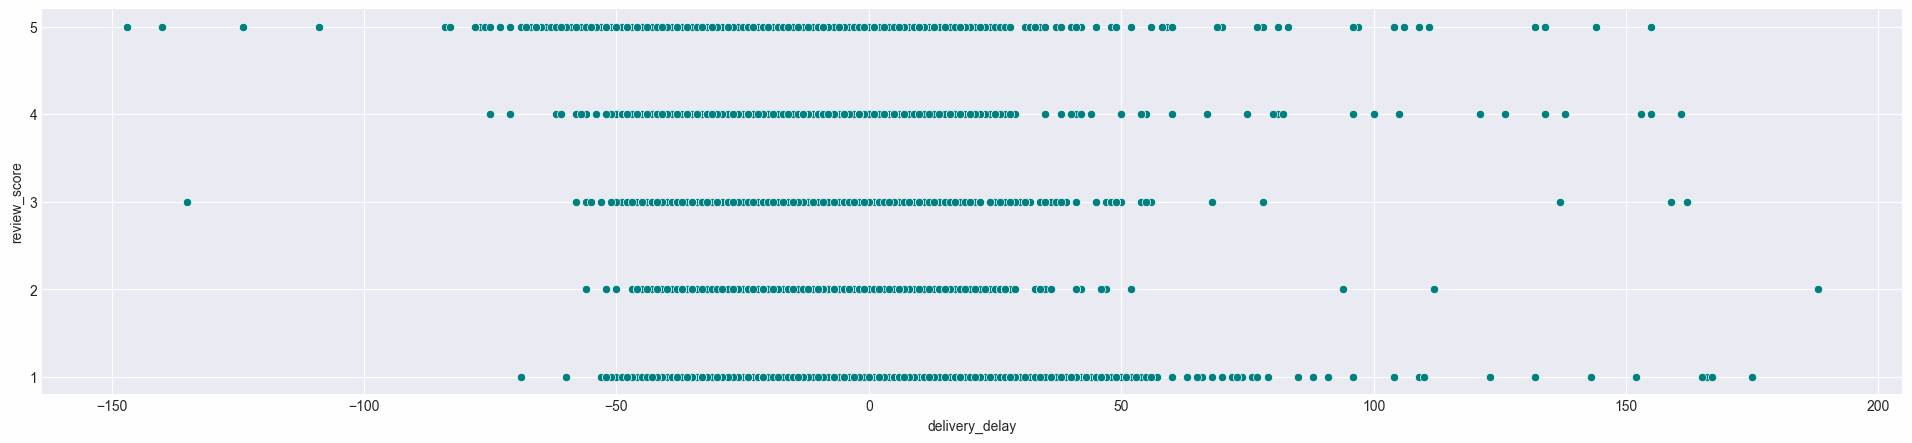

In [44]:
plt.figure(figsize=(24,5))
sns.scatterplot(y = 'review_score',x='delivery_delay',data= data,color = 'teal')
plt.yticks(np.linspace(1,5,5).astype(int))
plt.show()

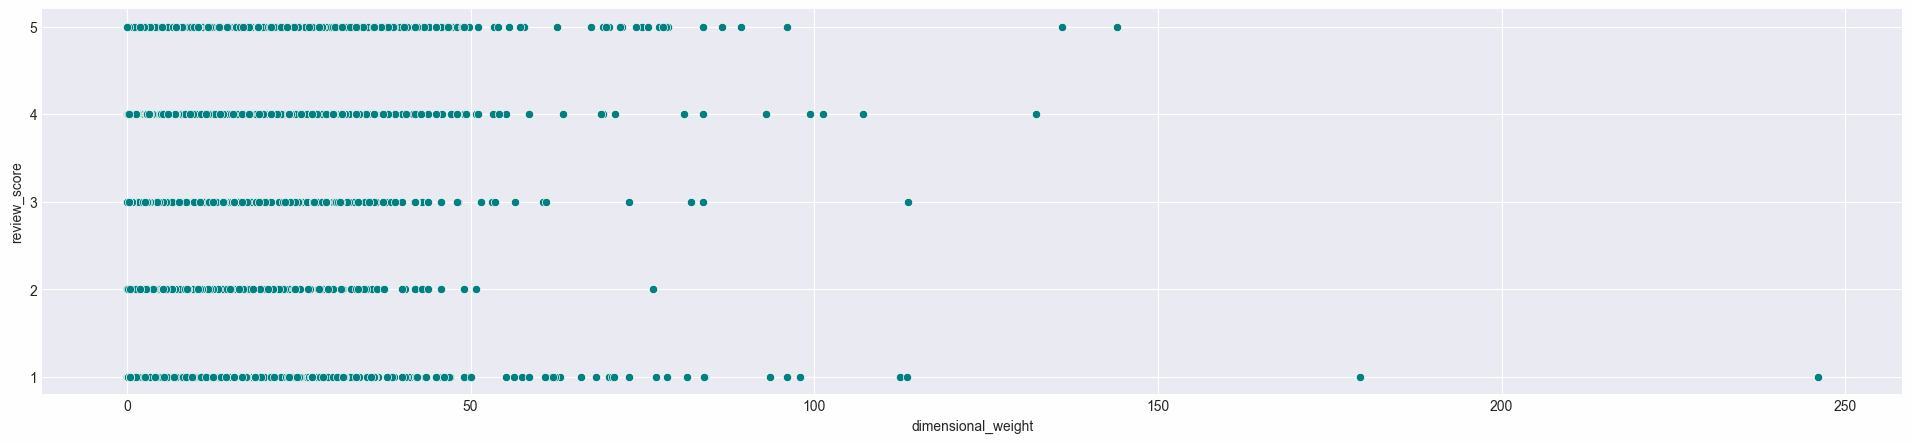

In [45]:
plt.figure(figsize=(24,5))
sns.scatterplot(y = 'review_score',x='dimensional_weight',data= data,color = 'teal')
plt.yticks(np.linspace(1,5,5).astype(int))
plt.show()

Findings from bivariate analysis with causes_readmisson column
urgentcare and ambulatory class showed a high percentage of readmission, after doing statistical test, we can validate that patients of these classes are more likely to cause readmission more

single marital class showed a high percentage of readmission, after doing statistical test wen can validate that marital class single have a moderate impact on readmission,with single marital being cause for readmission more than other marital classes

BLACK and NATIVE classes in race column showed a littile more percentage in readmission class, after doing statistical test, we can validate that race has a moderate relationship with readmission, andthese 2 classes are more likely to cause readmission

MALE patient_gender showed a little more in readmission class, after doing statistical test, we can validate that patient_gender male have more chance of causing readmisssion than female

FEMALE provider_gender showed a little high readmission, after doing statistical test, we can validate that female provider in encounter leads to slighly high readmission

avg_procedure_cost showed high mean for causing readmission...after doing statistical test we can validate that encuonter with high average procedure cost is more likely to cause readmission

avg_total_medicine_cost showed low average for causing readmission case, afte doing statistical test we can validate that lower the avg_total_medicine_cost leads to cause readmission

age column showed, for high aged people there is more chance of causing readmission than lower aged people

utilization column showed very low mean for non readmitted patients, after doing statistical test we validate these fact..so assumption is less experienced doctors are doing less readmission than more advantage, possible cause can be high severity disease are more handeled by experienced doctors